In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


## Setup training/test data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train_l), (x_test, y_test_l) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train_l, num_classes)
y_test = keras.utils.to_categorical(y_test_l, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Load pretrained model

In [3]:
model_save_name = 'mnist_classifier'
path = F"{model_save_name}" 
#model.save(path)
model = keras.models.load_model(path)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

## Compute network layer activations for each image

In [4]:
import nap
nap = nap.NeuralActivationPattern(x_test[:1000], y_test_l[:1000], model)
nap.summary(0)

             Layer    Activation shape
0           conv2d  (1000, 26, 26, 32)
1    max_pooling2d  (1000, 13, 13, 32)
2         conv2d_1  (1000, 11, 11, 64)
3  max_pooling2d_1    (1000, 5, 5, 64)
4          flatten        (1000, 1600)
5          dropout        (1000, 1600)
6            dense          (1000, 10)
Layer 0, number of clusters: 2
Layer 1, number of clusters: 2
Layer 2, number of clusters: 2
Layer 3, number of clusters: 13
Layer 4, number of clusters: 10
Layer 5, number of clusters: 10
Layer 6, number of clusters: 15


In [5]:
nap.summary(5)

## Show the images generating highest activations for each layer

In [6]:
def show_images(images, labels, layer_img_idx, titles, images_per_row = 10, img_scale = 0.05):
    for layer, img_idx in enumerate(layer_img_idx):
        import matplotlib.pyplot as plt
        imSize = int(img_scale*images[0].shape[1])
        from mpl_toolkits.axes_grid1 import ImageGrid
        # Get indices of the largest 
        sampleSize = len(img_idx)
        nCols = min(sampleSize, images_per_row)
        nRows =  max(1, int(sampleSize / images_per_row))

        fig = plt.figure(figsize=(nCols*imSize, nRows*imSize))
        grid = ImageGrid(fig, 111, nrows_ncols=(nRows, nCols))
        for ax, im in zip(grid, img_idx):
            ax.imshow(images[im])
            ax.set_title(labels[im])
        print(titles[layer])
        plt.title(label = titles[layer])
        plt.grid(False)
        plt.show()

In [7]:
max_activations = [nap.get_max_activations(layerId, agg_func = np.average) for layerId in range(len(model.layers)]
titles = [f"Layer {layer}" for layer in range(len(max_activations))]
show_images(x_test, y_test_l, max_activations, titles)

TypeError: list indices must be integers or slices, not tuple

# Neural Activation Clustering

In [ ]:
nSamplesPerLayer = 10

## Show inputs treated the same way by the network

Layer 0
Cluster: -1, size: 3


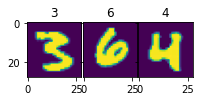

Cluster: 0, size: 7


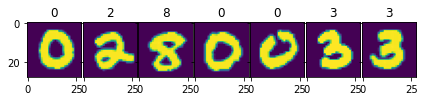

Cluster: 1, size: 990


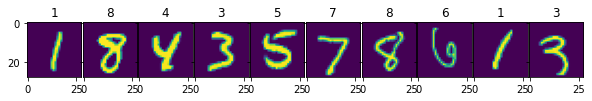

In [22]:
layerId = 0
clusters, cluster_ids, cluster_sizes = nap.get_cluster_activations(layerId) 
titles = []
for cluster_id, cluster_size in zip(cluster_ids, cluster_sizes):
    titles.append(F"Cluster: {cluster_id}, size: {cluster_size}")
print(F"Layer {layerId}")
show_images(x_test, y_test_l, clusters, titles)

### Show aggregated inputs treated the same way 

Layer 0, Clusters: 3


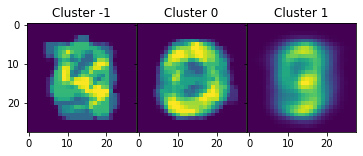

Layer 1, Clusters: 3


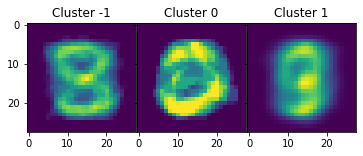

Layer 2, Clusters: 3


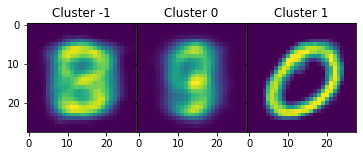

Layer 3, Clusters: 14


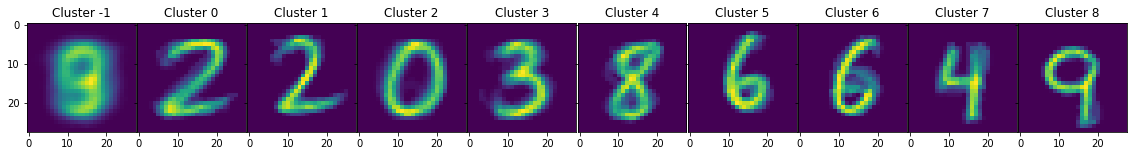

Layer 4, Clusters: 11


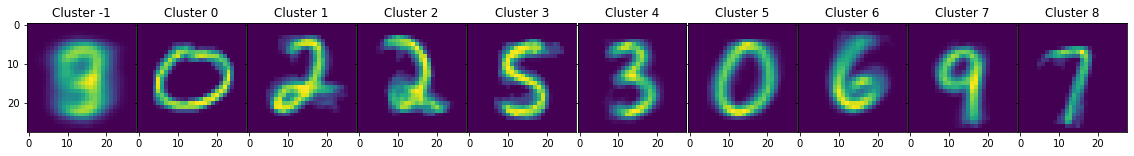

Layer 5, Clusters: 11


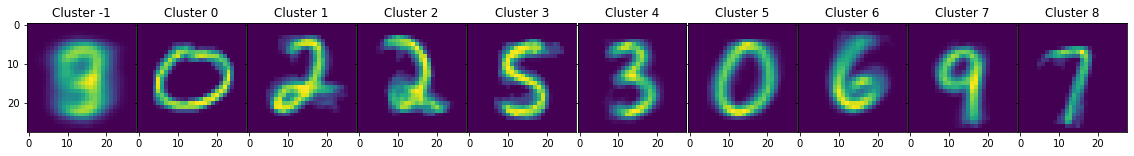

Layer 6, Clusters: 16


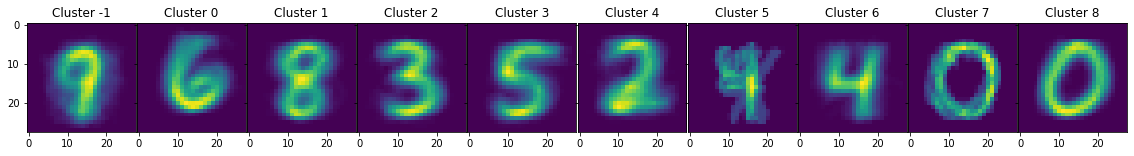

In [23]:
for layerId, layer in enumerate(model.layers):
    cluster_representatives, clusterIds, cluster_sizes = nap.get_cluster_representatives(layerId)
    cluster_labels = [f"Cluster {clusterId}" for clusterId in clusterIds]
    nClusters = len(cluster_representatives)
    indices = list(range(nClusters))
    show_images(cluster_representatives, cluster_labels, [indices], [f"Layer {layerId}, Clusters: {nClusters}"], img_scale=0.1)


### Show activation for each feature. Warning!!! slow code. 

In [ ]:

# Convert to slow, but plotting friendly pandas DataFrame
activations_df = {'input_data': [], 'layer': [], 'feature': [], 'activation':[]}
for dp in range(len(layer_activations)):
  for feature in range(len(nap.layer_activations[0])):
      for activation in layer_activations[:][feature]:
        activations_df['input_data'].append(dp)
        activations_df['layer'].append(clusterOnLayer)
        activations_df['feature'].append(feature)
        activations_df['activation'].append(activation)

activations_df = pd.DataFrame(activations_df)
activations_df.describe()

In [ ]:
px.scatter(activations_df, x='feature', y='activation')